# EJERCICIO FINAL MODULO 3 - LAURA GOMEZ

## Fase 1: Exploración y Limpieza

### 1.1 Exploración Inicial:

#### Descarga librerias y apertura de archivos

In [93]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas
pd.set_option('display.float_format', '{:.0f}'.format)  # formato de los números flotantes

In [94]:
df_flight = pd.read_csv("Customer Flight Activity.csv",index_col=0)
df_loyalty = pd.read_csv("Customer Loyalty History.csv",index_col=0)

#### Une los dos conjuntos de datos de la forma más eficiente.

In [95]:
# Unimos los datos con una unión interna (inner join) para mantener solo los registros que están en ambos DataFrames
# Esto es útil si queremos analizar solo los clientes que tienen tanto actividad de vuelo como historial de lealtad.

df = df_loyalty.join(df_flight, how='inner')


In [96]:
df.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335,465,38


####  Analisis de Datos (EDA)
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes. 
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas

In [97]:
# FUNCION ANÁLISIS EDA

def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(2))
    display(df.tail(2))
    display(df.sample(4))
    print('________________________________________________________________________________________________________\n')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________\n')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________\n')

    print('🧬 Tipos de datos y número de columnas de cada tipo:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________\n')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________\n')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________\n')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________\n')

    print('🐖Que porcentaje de nulos tenemos por columnas:')
    porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
    df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print('________________________________________________________________________________________________________\n')

    print("Las columnas categóricas que tienen nulos son :")
    nulos_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
    display(nulos_cat)
    print('________________________________________________________________________________________________________\n')

    print('🌋Estadísticas de los datos categóricos:')
    display(df.describe(include='object').T)
    print('________________________________________________________________________________________________________\n')

    print("Las columnas numéricas que tienen nulos son : ")
    nulos_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
    display(nulos_num)
    print('________________________________________________________________________________________________________\n')

    print('🍄Estadísticas de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________\n')


    

In [98]:
eda_basico(df)

🌷Ejemplo de datos del DF:


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282,0,0


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049,Married,Star,83325,Standard,2015,12,2016,8,2018,11,0,0,0,0,0,0,0
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049,Married,Star,83325,Standard,2015,12,2016,8,2018,12,0,0,0,0,0,0,0


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
893127,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,56644,Divorced,Star,27790,Standard,2018,8,NaN,NaN,2018,9,0,0,0,0,0,0,0
709948,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,81762,Married,Star,5244,Standard,2015,7,NaN,NaN,2017,7,9,5,14,4480,448,0,0
571603,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,College,NaN,Divorced,Nova,4983,2018 Promotion,2018,2,NaN,NaN,2018,1,0,0,0,0,0,0,0
206925,Canada,Quebec,Montreal,H2Y 4R4,Female,High School or Below,54094,Divorced,Aurora,28432,Standard,2014,9,NaN,NaN,2018,8,0,0,0,0,0,0,0


________________________________________________________________________________________________________

🌻Número de Filas:


405624

________________________________________________________________________________________________________

🌱Número de Columnas:


24

________________________________________________________________________________________________________

🧬 Tipos de datos y número de columnas de cada tipo:


int64      10
object      9
float64     5
Name: count, dtype: int64

________________________________________________________________________________________________________

🌑Nombre de las columnas:


Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

________________________________________________________________________________________________________

🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 480934 to 652627
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital Status               405624 non-null  object 
 8   Loyalty Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment Type              405624 non-null

None

________________________________________________________________________________________________________

🐲Filas duplicadas:
cantidad de duplicados: 1864
Primeros duplicados


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2017,1,0,0,0,0,0,0,0
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2018,8,0,0,0,0,0,0,0
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2018,11,0,0,0,0,0,0,0


________________________________________________________________________________________________________

🐖Que porcentaje de nulos tenemos por columnas:


,%_nulos
Salary,25
Cancellation Year,88
Cancellation Month,88


________________________________________________________________________________________________________

Las columnas categóricas que tienen nulos son :


Index([], dtype='object')

________________________________________________________________________________________________________

🌋Estadísticas de los datos categóricos:


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


________________________________________________________________________________________________________

Las columnas numéricas que tienen nulos son : 


Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')

________________________________________________________________________________________________________

🍄Estadísticas de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Salary,302952,79269,34992,-58486,59262,73479,88612,407228
CLV,405624,7992,6864,1898,3985,5776,8937,83325
Enrollment Year,405624,2015,2,2012,2014,2015,2017,2018
Enrollment Month,405624,7,3,1,4,7,10,12
Cancellation Year,50064,2016,1,2013,2016,2017,2018,2018
Cancellation Month,50064,7,3,1,4,7,10,12
Year,405624,2018,1,2017,2017,2018,2018,2018
Month,405624,6,3,1,4,6,9,12
Flights Booked,405624,4,5,0,0,1,8,21
Flights with Companions,405624,1,2,0,0,0,1,11


________________________________________________________________________________________________________



### 1.2 Limpieza de Datos 
 - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
 estén completos.
 -  Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
 presenten de forma coherente.
 - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
 datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [99]:
# FUNCION NULOS Y DUPLICADOS
def consulta_nulos_duplicados (df):

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________\n')

    print('🐖Que porcentaje de nulos tenemos por columnas:')
    porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
    df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print('________________________________________________________________________________________________________\n')

In [100]:
consulta_nulos_duplicados(df)

🐲Filas duplicadas:
cantidad de duplicados: 1864
Primeros duplicados


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2017,1,0,0,0,0,0,0,0
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2018,8,0,0,0,0,0,0,0
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3845,Standard,2012,5,NaN,NaN,2018,11,0,0,0,0,0,0,0


________________________________________________________________________________________________________

🐖Que porcentaje de nulos tenemos por columnas:


,%_nulos
Salary,25
Cancellation Year,88
Cancellation Month,88


________________________________________________________________________________________________________



In [101]:
# Borramos las filas duplicadas
df = df.drop_duplicates()

In [102]:
#Borramos las columnas que tienen más del 50% de nulos
df.drop('Cancellation Year', axis=1, inplace=True)
df.drop('Cancellation Month', axis=1, inplace=True)

In [103]:
#Borramos la columna Country porque solo tiene un valor único
df.drop(['Country'], axis=1, inplace=True)

In [104]:
df.columns

Index(['Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [ ]:
# Creamos una columna nueva para el año y mes de la fecha de enrrollement

df['Mes_Año'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
# Convertimos la columna Mes_Año a tipo fecha
df['Mes_Año'] = pd.to_datetime(df['Mes_Año'], format='%m-%Y')


In [107]:
# Analizamos lalos datos de la columna 'Salary' que tiene un 25% de nulos
df['Salary'].describe().round(2).T

count   301500
mean     79259
std      34984
min     -58486
25%      59262
50%      73479
75%      88606
max     407228
Name: Salary, dtype: float64

In [108]:
# Convertir a valores absolutos ya que entendemos que los salarios no pueden ser negativos

df['Salary'] = df['Salary'].abs()  

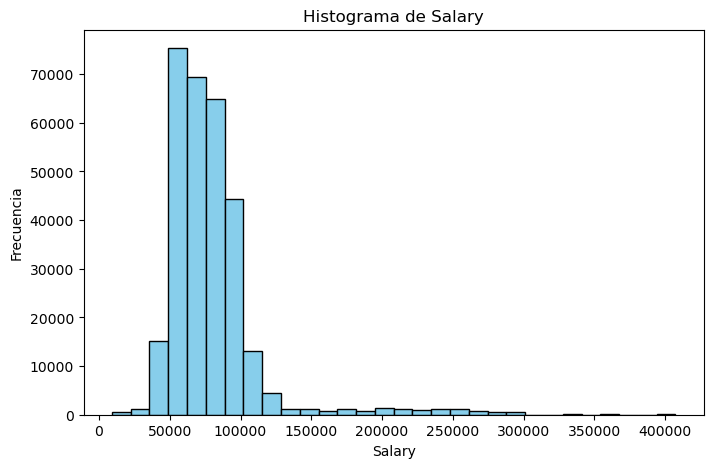

In [109]:
# Crear un histograma de salary para ver su distribución

plt.figure(figsize=(8, 5))
plt.hist(df['Salary'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histograma de Salary') 
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()

In [110]:
# Gestionamos nulos con "KNN" (Sería la mejor opción para este caso pero requiere más tiempo de procesamiento)

#imputer_knn = KNNImputer(n_neighbors = 5)
#df[["Salary"]] = imputer_knn.fit_transform(df[["Salary"]])
#df[["Salary"]].isnull().sum()

In [111]:
# Gestionamos nulos con IterativeImputer
# Este método utiliza un modelo de regresión para predecir los valores nulos basándose en otras variables del dataset

imputer_iteractive = IterativeImputer(max_iter = 100, random_state = 42)
df[["Salary"]] = imputer_iteractive.fit_transform(df[["Salary"]])
df[["Salary"]].isnull().sum()

Salary    0
dtype: int64

In [112]:
# Repetimos la consulta de nulos y duplicados para verificar los cambios
consulta_nulos_duplicados(df)

🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________

🐖Que porcentaje de nulos tenemos por columnas:


,%_nulos


________________________________________________________________________________________________________



In [113]:
#Repasamos la función EDA para ver los cambios después de la imputación de nulos y ver si hay que hacer algo más
eda_basico(df)

🌷Ejemplo de datos del DF:


,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Mes_Año
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,2017,1,0,0,0,0,0,0,0,1-2017
480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839,Standard,2016,2,2017,2,3,0,3,2823,282,0,0,2-2017


,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Mes_Año
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049,Married,Star,83325,Standard,2015,12,2018,11,0,0,0,0,0,0,0,11-2018
652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049,Married,Star,83325,Standard,2015,12,2018,12,0,0,0,0,0,0,0,12-2018


,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Mes_Año
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
930718,Quebec,Montreal,H2T 2J6,Female,High School or Below,63577,Married,Star,4038,Standard,2015,7,2018,6,18,0,18,3042,304,0,0,6-2018
813455,Quebec,Montreal,H2T 2J6,Female,Bachelor,48264,Married,Star,13990,2018 Promotion,2018,4,2018,1,0,0,0,0,0,0,0,1-2018
520202,Quebec,Quebec City,G1B 3L5,Male,High School or Below,62836,Married,Nova,6432,Standard,2017,11,2017,8,0,0,0,0,0,0,0,8-2017
347914,Quebec,Montreal,H4G 3T4,Male,Bachelor,56601,Married,Aurora,23537,Standard,2018,5,2018,12,10,2,12,2040,204,0,0,12-2018


________________________________________________________________________________________________________

🌻Número de Filas:


403760

________________________________________________________________________________________________________

🌱Número de Columnas:


22

________________________________________________________________________________________________________

🧬 Tipos de datos y número de columnas de cada tipo:


int64      10
object      9
float64     3
Name: count, dtype: int64

________________________________________________________________________________________________________

🌑Nombre de las columnas:


Index(['Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Mes_Año'],
      dtype='object')

________________________________________________________________________________________________________

🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 480934 to 652627
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Province                     403760 non-null  object 
 1   City                         403760 non-null  object 
 2   Postal Code                  403760 non-null  object 
 3   Gender                       403760 non-null  object 
 4   Education                    403760 non-null  object 
 5   Salary                       403760 non-null  float64
 6   Marital Status               403760 non-null  object 
 7   Loyalty Card                 403760 non-null  object 
 8   CLV                          403760 non-null  float64
 9   Enrollment Type              403760 non-null  object 
 10  Enrollment Year              403760 non-null

None

________________________________________________________________________________________________________

🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________

🐖Que porcentaje de nulos tenemos por columnas:


,%_nulos


________________________________________________________________________________________________________

Las columnas categóricas que tienen nulos son :


Index([], dtype='object')

________________________________________________________________________________________________________

🌋Estadísticas de los datos categóricos:


,count,unique,top,freq
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419
Mes_Año,403760,24,9-2018,16845


________________________________________________________________________________________________________

Las columnas numéricas que tienen nulos son : 


Index([], dtype='object')

________________________________________________________________________________________________________

🍄Estadísticas de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Salary,403760,79372,30008,9081,63901,79372,82940,407228
CLV,403760,7991,6863,1898,3982,5776,8937,83325
Enrollment Year,403760,2015,2,2012,2014,2015,2017,2018
Enrollment Month,403760,7,3,1,4,7,10,12
Year,403760,2018,1,2017,2017,2018,2018,2018
Month,403760,7,3,1,4,7,10,12
Flights Booked,403760,4,5,0,0,1,8,21
Flights with Companions,403760,1,2,0,0,0,1,11
Total Flights,403760,5,7,0,0,1,10,32
Distance,403760,1214,1434,0,0,525,2342,6293


________________________________________________________________________________________________________



In [114]:
# Consulta de  sus valores únicos

print('🌼Valores únicos de las columnas categóricas son:\n')

for col in df.select_dtypes(include='object'):
    print(col)
    print('-----------------------------')
    print(df[col].unique())

print('\n\n')
print('🌼Valores únicos de las columnas numericas son:\n')

for col in df.select_dtypes(include='number'):
    print(col)
    print('-----------------------------')
    print(df[col].unique())

🌼Valores únicos de las columnas categóricas son:

Province
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Postal Code
-----------------------------
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G

In [115]:
df.sample(5)

,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Mes_Año
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
309456,Quebec,Montreal,H2Y 4R4,Male,High School or Below,67018,Single,Aurora,43290,Standard,2016,1,2017,11,0,0,0,0,0,0,0,11-2017
277769,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,48181,Married,Aurora,5054,Standard,2018,5,2017,11,0,0,0,0,0,0,0,11-2017
622906,New Brunswick,Fredericton,E3B 2H2,Male,College,79372,Single,Star,2694,Standard,2013,5,2018,8,12,0,12,2820,282,0,0,8-2018
958243,Ontario,London,M5B 3E4,Male,College,79372,Married,Star,4570,Standard,2017,1,2018,6,18,0,18,1512,151,0,0,6-2018
286718,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,90871,Married,Nova,3193,Standard,2017,8,2018,9,0,0,0,0,0,0,0,9-2018


##  Fase 2: Visualización

####  1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [139]:
df1=df.groupby(["Mes_Año"])["Flights Booked"].sum().reset_index().sort_values(by="Mes_Año", ascending=True)
df1

,Mes_Año,Flights Booked
0,2017-01-01,47766
1,2017-02-01,47691
2,2017-03-01,64271
3,2017-04-01,55720
4,2017-05-01,65279
5,2017-06-01,80493
6,2017-07-01,89288
7,2017-08-01,78692
8,2017-09-01,63304
9,2017-10-01,60351


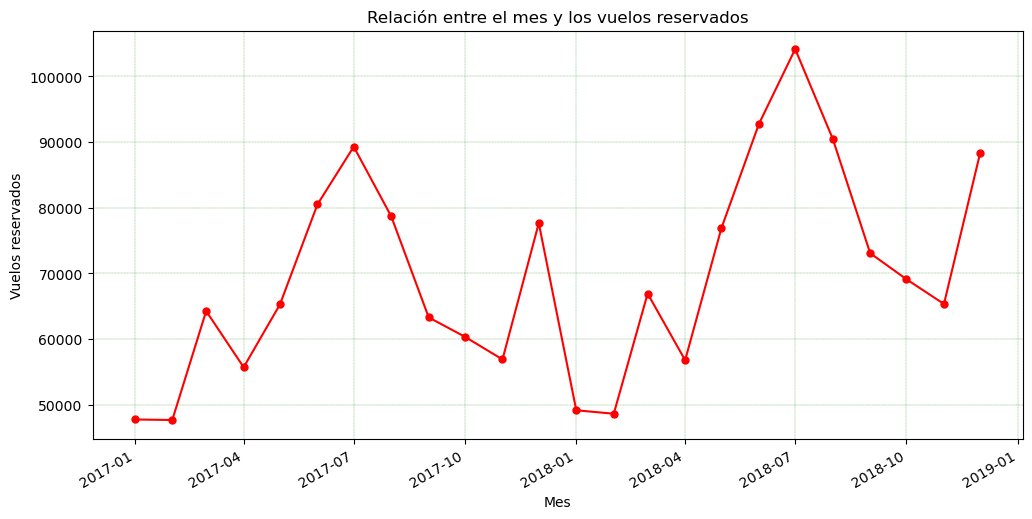

In [148]:
plt.figure(figsize=(12, 6))

plt.title("Relación entre el mes y los vuelos reservados")
plt.plot(df1['Mes_Año'], df1['Flights Booked'], c='r', marker='.', markersize=10, linestyle='-', linewidth=1.5)
plt.grid(c='g', linestyle='--', linewidth=0.2)
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.gcf().autofmt_xdate()  # Ajusta las etiquetas del eje x para que no se superpongan
plt.ylabel("Vuelos reservados")
plt.show()

####   2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [118]:
df2=df.groupby(["Distance"])["Points Accumulated"].sum()
df2= pd.DataFrame(df2)
df2

,Points Accumulated
Distance,
0,0
90,9
91,28
92,18
94,27
95,19
96,18
97,19
98,38


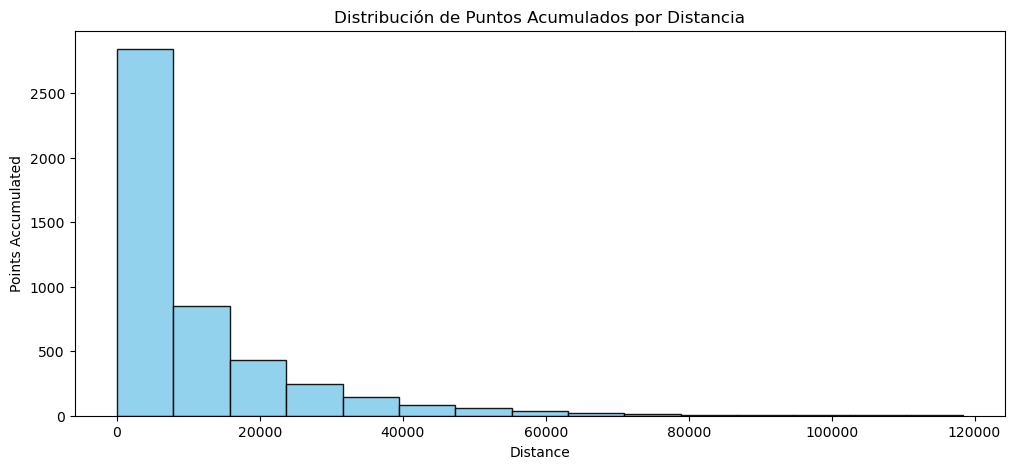

In [119]:
plt.figure(figsize=(12, 5))
plt.hist(df2['Points Accumulated'], bins=15, color='skyblue',edgecolor='black', alpha=0.9)
plt.title('Distribución de Puntos Acumulados por Distancia') 
plt.xlabel('Distance') 
plt.ylabel('Points Accumulated') 
plt.show()

####  3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [120]:
df3=df['Province'].value_counts().sort_values(ascending=False)
df3

Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64

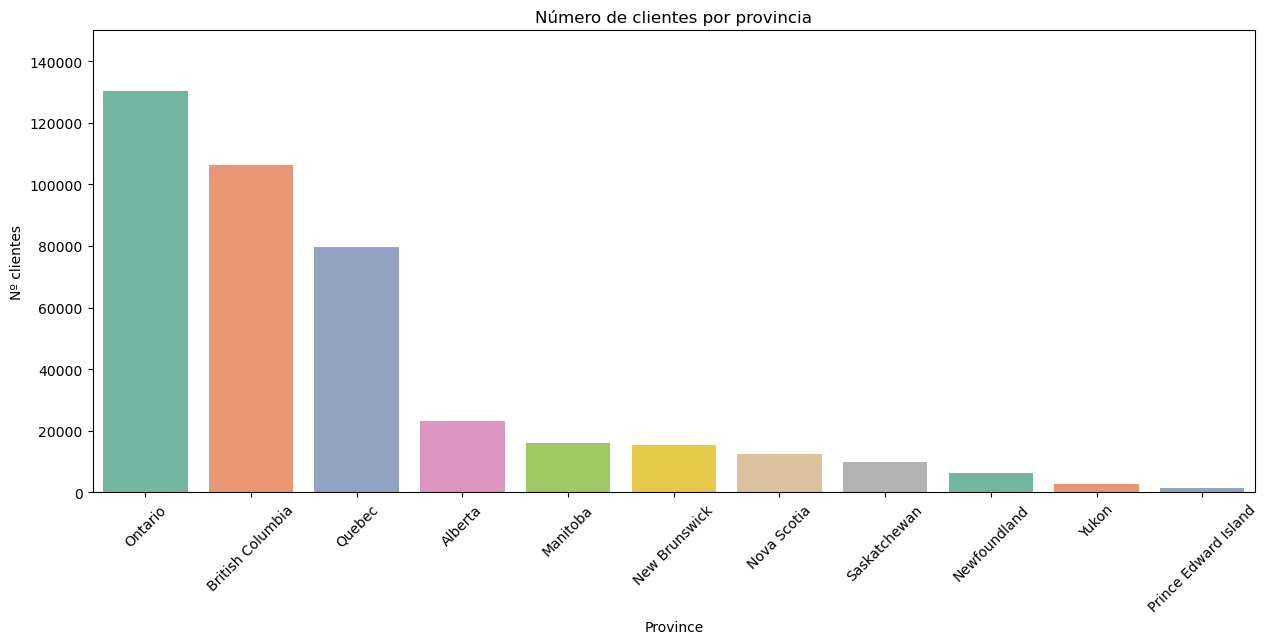

In [121]:
plt.figure(figsize=(15, 6))

sns.countplot(
    x='Province',
    data=df,
    palette='Set2',
    order=df['Province'].value_counts().index
)

plt.xticks(rotation=45)
plt.xlabel("Province")
plt.ylabel("Nº clientes")
plt.title("Número de clientes por provincia")
plt.ylim(0, 150000)
plt.show()


####  4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes

In [122]:
df4=df.groupby(["Education"])["Salary"].mean().round(2).reset_index().sort_values(by='Salary', ascending=False)
df4

,Education,Salary
2,Doctor,178404
4,Master,103735
1,College,79372
0,Bachelor,72599
3,High School or Below,61146


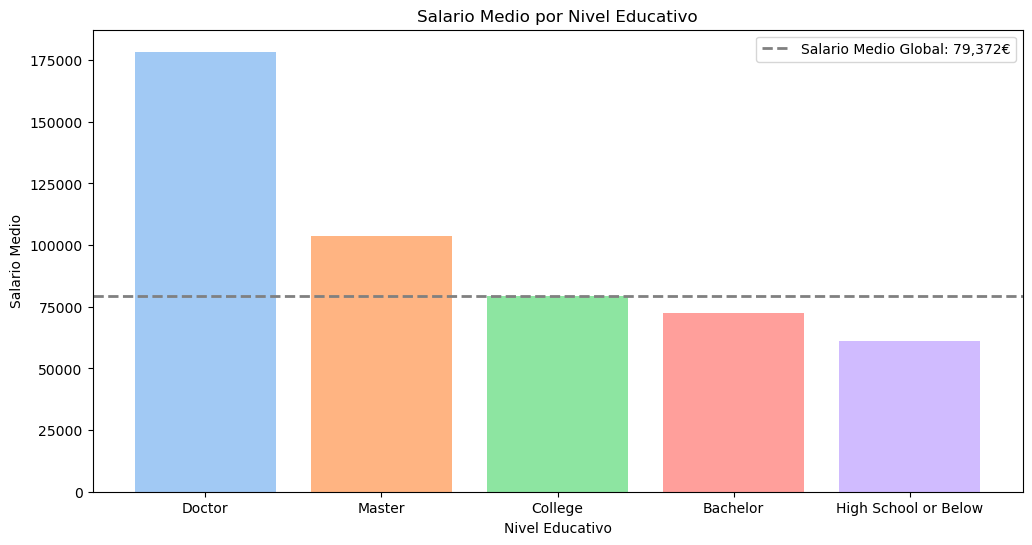

In [151]:
colors = sns.color_palette("pastel", len(df4))  #añadir linea con la media
average_salary = df['Salary'].mean()
plt.figure(figsize=(12, 6))
plt.bar(x='Education', height='Salary', data=df4, color=colors)
plt.title('Salario Medio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Medio')
plt.axhline(y=average_salary, color='gray', linestyle='--', linewidth=2, label=f'Salario Medio Global: {average_salary:,.0f}€')
plt.legend()
plt.show()

####  5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [124]:
df5=df['Loyalty Card'].value_counts().sort_values(ascending=False)
df5

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

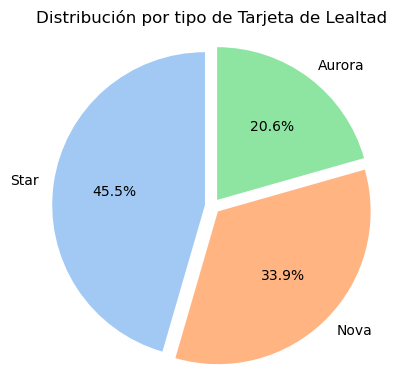

In [125]:
plt.figure(figsize=(4, 4))
plt.pie(df5, 
        labels=df5.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel', len(df5)),
        explode=[0.05]*len(df5))

plt.title('Distribución por tipo de Tarjeta de Lealtad')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [126]:
df6=df.groupby(['Marital Status', 'Gender']).size().unstack(fill_value=0)
df6

Gender,Female,Male
Marital Status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


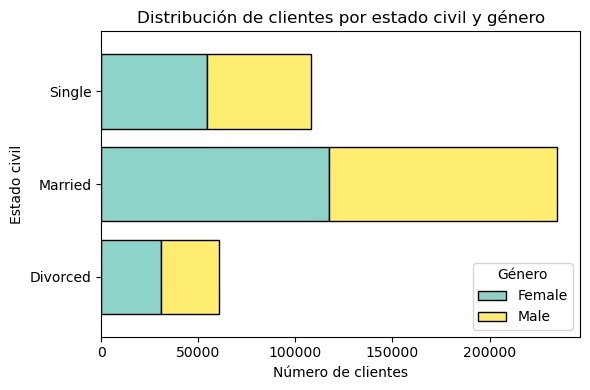

In [127]:
df6.plot(
    kind='barh',
    stacked=True,
    figsize=(6, 4),
    colormap='Set3',
    width=0.8,
    edgecolor='black'
)

# 4. Personalizar
plt.xlabel("Número de clientes")
plt.ylabel("Estado civil")
plt.title("Distribución de clientes por estado civil y género")
plt.legend(title="Género", loc='lower right')
plt.tight_layout()
plt.show()

##  BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

#### 1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:'Flights Booked' y 'Education'.

In [152]:
df7= df[['Education','Flights Booked']]

#### 2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [153]:
df8= df7.groupby('Education')['Flights Booked'].describe().T.round(2)
df8

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567,102260,17731,18915,12287
mean,4,4,4,4,4
std,5,5,5,5,5
min,0,0,0,0,0
25%,0,0,0,0,0
50%,1,1,1,1,1
75%,8,8,8,8,8
max,21,21,21,21,21


#### 3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [154]:
# Creamos una variable para cada grupo de educación

grupo_bachelor = df7[df7['Education'] == 'Bachelor']['Flights Booked']
grupo_master = df7[df7['Education'] == 'Master']['Flights Booked']
grupo_college = df7[df7['Education'] == 'College']['Flights Booked']
grupo_high_school = df7[df7['Education'] == 'High School or Below']['Flights Booked']
grupo_doctor= df7[df7['Education'] == 'Doctor']['Flights Booked']


In [131]:
from scipy import stats

def prueba_hipotesis_multigrupo(*args):
    """
    Realiza una prueba de hipótesis para comparar más de dos grupos.
    1. Verifica normalidad con Shapiro o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no, usa Levene.
    3. Si los datos son normales y varianzas iguales, usa ANOVA. Si no, usa Kruskal-Wallis.

    Parámetros:
    *args: listas o arrays con los datos de cada grupo (mínimo 2)

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """

    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")

    # Normalidad
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)

    # Varianza
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue
    else:
        p_valor_varianza = stats.levene(*args, center='median').pvalue

    varianzas_iguales = p_valor_varianza > 0.05

    # Test adecuado
    if datos_normales and varianzas_iguales:
        f_stat, p_valor = stats.f_oneway(*args)
        test_usado = "ANOVA (datos normales, varianzas iguales)"
        estadistico = f_stat
    else:
        h_stat, p_valor = stats.kruskal(*args)
        test_usado = "Kruskal-Wallis (datos no normales o varianzas desiguales)"
        estadistico = h_stat

    alfa = 0.05

    resultado = {
        "Test de Normalidad por grupo": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": estadistico,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, hay diferencias significativas entre grupos." if p_valor < alfa else "No se rechaza H0. No hay diferencias significativas entre grupos."
    }

    # Imprimir resultados
    print("\n📊 **Resultados de la Prueba de Hipótesis Multigrupo** 📊")
    print(f"✅ Todos los grupos normales: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Varianzas: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {estadistico:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado


In [155]:
prueba_hipotesis_multigrupo(grupo_bachelor, grupo_master, grupo_college, grupo_high_school, grupo_doctor)


📊 **Resultados de la Prueba de Hipótesis Multigrupo** 📊
✅ Todos los grupos normales: No
   - Normalidad por grupo: [False, False, False, False, False]
✅ Varianzas: Desiguales (p = 0.0150)
✅ Test aplicado: Kruskal-Wallis (datos no normales o varianzas desiguales)
📉 Estadístico: 17.5326, p-valor: 0.0015
🔍 Conclusión: Rechazamos H0. Es decir, hay diferencias significativas entre grupos.



{'Test de Normalidad por grupo': [False, False, False, False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.014969793534581529,
 'Varianzas Iguales': False,
 'Test Usado': 'Kruskal-Wallis (datos no normales o varianzas desiguales)',
 'Estadístico': 17.532618623121756,
 'p-valor': 0.0015225470219889367,
 'Conclusión': 'Rechazamos H0. Es decir, hay diferencias significativas entre grupos.'}

In [156]:
# Guardamos el DataFrame limpio en un nuevo archivo CSV 
df.to_csv("Customer_Flight_Activity_Cleaned.csv", index=False)
